<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/CatBoostClassifier_Model_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pip --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib catboost ipywidgets --user -q --no-warn-script-location

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.3 MB/s eta 0:00:00


In [2]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
import catboost as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Placement_Data.csv') ## reading the data

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.shape

(215, 15)

In [7]:
X=df.drop('status',axis=1) 
y=df['status']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42) ## Train:Test = 75:25

In [10]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,plot_confusion_matrix

In [11]:
cat_feat=df.select_dtypes(include='object')
print(cat_feat.columns)

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')


In [12]:
cat_feat_cols=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex','specialisation']

In [13]:
#(CatBoostClassifier)

In [14]:
model_cbc=CatBoostClassifier(iterations=100, random_state=42, eval_metric='Accuracy')

In [15]:
model_fit=model_cbc.fit(X_train,y_train, cat_features=cat_feat_cols, plot=True, eval_set=(X_test,y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.054953
0:	learn: 0.9627329	test: 0.9629630	best: 0.9629630 (0)	total: 53.5ms	remaining: 5.3s
1:	learn: 0.9875776	test: 0.9814815	best: 0.9814815 (1)	total: 63.5ms	remaining: 3.11s
2:	learn: 0.9813665	test: 0.9629630	best: 0.9814815 (1)	total: 66ms	remaining: 2.13s
3:	learn: 0.9813665	test: 0.9629630	best: 0.9814815 (1)	total: 71.4ms	remaining: 1.71s
4:	learn: 0.9875776	test: 0.9814815	best: 0.9814815 (1)	total: 74.6ms	remaining: 1.42s
5:	learn: 0.9875776	test: 1.0000000	best: 1.0000000 (5)	total: 79ms	remaining: 1.24s
6:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 82.8ms	remaining: 1.1s
7:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 88.7ms	remaining: 1.02s
8:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 93.7ms	remaining: 948ms
9:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 121ms	remaining: 1.09s
10:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (5)	total: 122ms	remaining: 989ms
11:	learn: 1.0000000

In [18]:
from google.colab import output
output.enable_custom_widget_manager()

In [22]:
from google.colab import output
output.disable_custom_widget_manager()

In [19]:
y_pred=model_fit.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


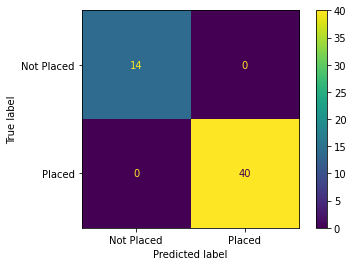

In [20]:
plot_confusion_matrix(model_fit,X_test,y_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00        14
      Placed       1.00      1.00      1.00        40

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

